# E-Commerce Sales Insights and Customer Segmentation

## Problem Statement:


###  E-commerce company's sales data to derive actionable insights.
#### The goals are:

##### - Perform exploratory data analysis (EDA) to understand sales trends, customer behavior, and product performance.
##### - Build a customer segmentation model using clustering techniques (e.g., K-Means).
##### - Provide business recommendations based on the analysis.

## Dataset

### A sample dataset such as ecommerce_sales.csv with the following columns:

##### - Order_ID: Unique order identifier
##### - Customer_ID: Unique customer identifier
##### - Order_Date: Date of the order
##### - Product: Product name
##### - Category: Product category
##### - Quantity: Quantity purchased
##### - Price: Price per unit
##### - Revenue: Total revenue for the order
##### - Country: Customer's country

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [28]:
# Load the dataset
df = pd.read_excel(r"c:\Users\shiva\Downloads\ecommerce_sales.xlsx")  # Adjust path if necessary
df["Order_Date"] = pd.to_datetime(df["Order_Date"])  # Convert to datetime

In [29]:
# Step 1: Exploratory Data Analysis (EDA)
# Overview of the dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Order_ID     20 non-null     int64         
 1   Customer_ID  20 non-null     object        
 2   Order_Date   20 non-null     datetime64[ns]
 3   Product      20 non-null     object        
 4   Category     20 non-null     object        
 5   Quantity     20 non-null     int64         
 6   Price        20 non-null     int64         
 7   Revenue      20 non-null     int64         
 8   Country      20 non-null     object        
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 1.5+ KB
None
         Order_ID           Order_Date   Quantity       Price     Revenue
count    20.00000                   20  20.000000   20.000000   20.000000
mean   1010.50000  2024-01-23 16:48:00   1.400000  190.750000  202.500000
min    1001.00000  2024-01-15 00:00:00   1.000000   15.000000  

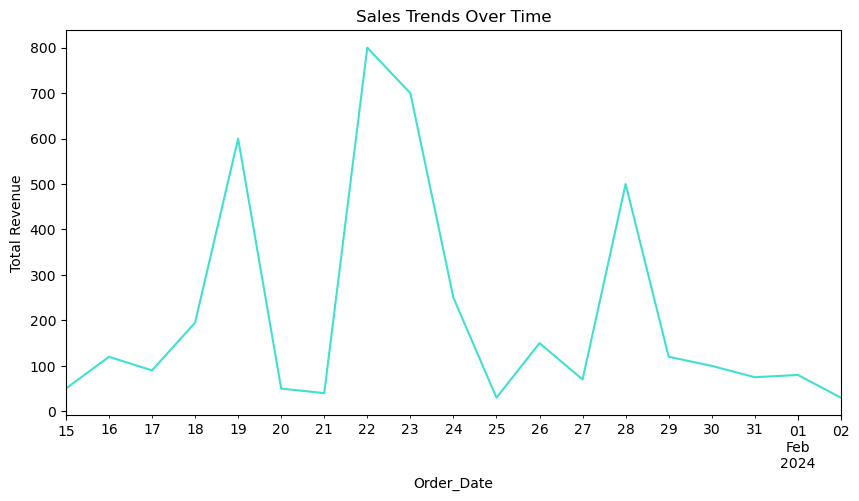

In [30]:
# Sales trends over time
sales_by_date = df.groupby("Order_Date")["Revenue"].sum()
plt.figure(figsize=(10, 5))
sales_by_date.plot(kind="line", title="Sales Trends Over Time", color="turquoise")
plt.ylabel("Total Revenue")
plt.show()

C:\Users\shiva\AppData\Local\Temp\ipykernel_3952\3195368927.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


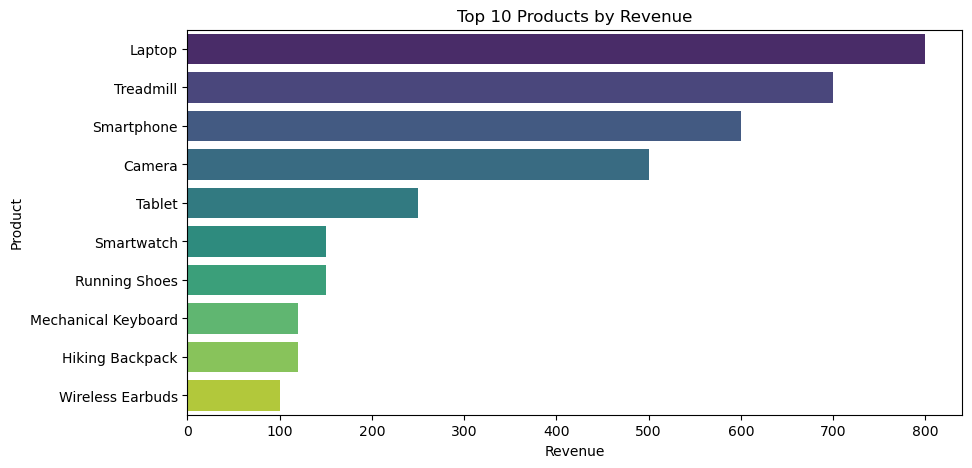

In [31]:
# Top-performing products
top_products = df.groupby("Product")["Revenue"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product")
plt.show()

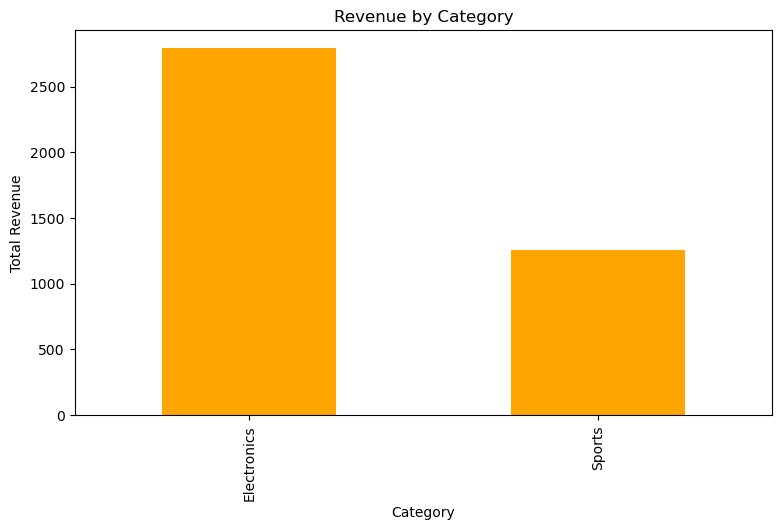

In [39]:
# Revenue by category
revenue_by_category = df.groupby("Category")["Revenue"].sum()
plt.figure(figsize=(9, 5))
revenue_by_category.plot(kind="bar", color="orange", title="Revenue by Category")
plt.ylabel("Total Revenue")
plt.show()

In [33]:
# Step 2: Customer Segmentation Using RFM Analysis
# Recency: Days since the customer's last purchase
# Frequency: Number of purchases
# Monetary: Total revenue from the customer
rfm = df.groupby("Customer_ID").agg({
    "Order_Date": lambda x: (df["Order_Date"].max() - x.max()).days,
    "Order_ID": "count",
    "Revenue": "sum"
}).rename(columns={"Order_Date": "Recency", "Order_ID": "Frequency", "Revenue": "Monetary"})


In [34]:
# Normalize the RFM data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

In [35]:
# K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
rfm["Cluster"] = kmeans.fit_predict(rfm_scaled)

C:\Users\shiva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


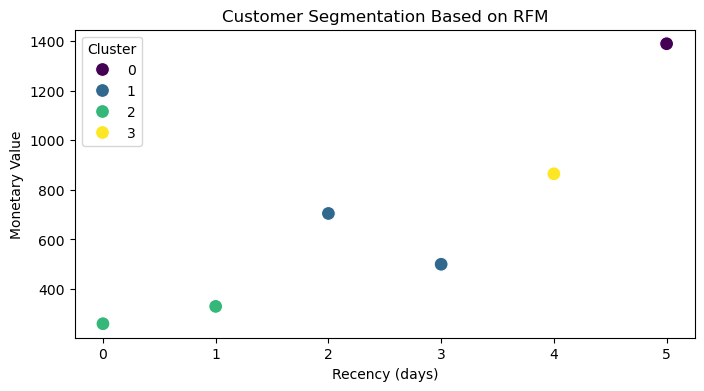

In [36]:
# Visualize Clusters
plt.figure(figsize=(8, 4))
sns.scatterplot(data=rfm, x="Recency", y="Monetary", hue="Cluster", palette="viridis", s=100)
plt.title("Customer Segmentation Based on RFM")
plt.xlabel("Recency (days)")
plt.ylabel("Monetary Value")
plt.legend(title="Cluster")
plt.show()

In [37]:
# Step 3: Business Recommendations
# Analyze clusters
cluster_summary = rfm.groupby("Cluster").mean()
print(cluster_summary)

         Recency  Frequency  Monetary
Cluster                              
0            5.0        3.0    1390.0
1            2.5        3.0     602.5
2            0.5        4.0     295.0
3            4.0        3.0     865.0


In [38]:
# Provide recommendations
print("Recommendations:")
print("1. Target high-value customers (Cluster X) with loyalty programs or exclusive offers.")
print("2. Re-engage recent, low-value customers (Cluster Y) with promotional discounts.")
print("3. Focus on converting potential high-value customers (Cluster Z) into loyal customers.")


Recommendations:
1. Target high-value customers (Cluster X) with loyalty programs or exclusive offers.
2. Re-engage recent, low-value customers (Cluster Y) with promotional discounts.
3. Focus on converting potential high-value customers (Cluster Z) into loyal customers.
